# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Reading Data

In [2]:
dataset = pd.read_csv('FinalDataSet.csv')

In [3]:
dataset.head()

,Bedroom,Bathroom,Floor,Parking,Property Face,Build Year(In B.S.),Area Covered(Sq.Feet),Posted Date(Moth Ago),Price(NRS.),District,Location,Road Distance(Feet),Type of Road
0,6,5,2.5,1,West,2068.0,1326.21,3,40000000,Kathmandu,Chhauni,13,Blacktopped
1,5,5,2.5,1,South East,NaN,1026.75,1,27500000,Lalitpur,Imadol,12,Concrete
2,3,4,2.5,1,North East,NaN,1369.00,9,34000000,Lalitpur,Imadol,18,Soil Stabilized
3,5,6,3.0,1,South,2080.0,1796.81,1,55000000,Lalitpur,Imadol,13,Paved
4,6,7,3.0,3,East,2077.0,3080.25,36,150000000,Lalitpur,Dhobighat,16,Gravelled


In [4]:
dataset.describe()

,Bedroom,Bathroom,Floor,Parking,Build Year(In B.S.),Area Covered(Sq.Feet),Posted Date(Moth Ago),Price(NRS.),Road Distance(Feet)
count,569.000000,569.000000,569.000000,569.000000,342.000000,569.000000,569.000000,5.690000e+02,569.000000
mean,5.277680,3.493849,2.672847,1.695958,2075.517544,3945.985343,24.674868,3.586082e+07,14.676626
std,2.258835,1.592361,0.699689,2.050593,5.038094,16377.196456,20.809111,2.946637e+07,4.852489
min,2.000000,0.000000,1.000000,0.000000,2042.000000,855.620000,1.000000,5.200000e+06,0.000000
25%,4.000000,3.000000,2.500000,1.000000,2074.000000,1112.310000,2.000000,2.140000e+07,13.000000
50%,5.000000,4.000000,2.500000,1.000000,2076.000000,1369.000000,24.000000,2.850000e+07,13.000000
75%,6.000000,4.000000,3.000000,2.000000,2079.000000,1925.150000,48.000000,3.905000e+07,18.000000
max,18.000000,10.000000,5.500000,31.000000,2081.000000,291597.000000,60.000000,2.800000e+08,36.000000


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Bedroom                569 non-null    int64  
 1   Bathroom               569 non-null    int64  
 2   Floor                  569 non-null    float64
 3   Parking                569 non-null    int64  
 4   Property Face          569 non-null    object 
 5   Build Year(In B.S.)    342 non-null    float64
 6   Area Covered(Sq.Feet)  569 non-null    float64
 7   Posted Date(Moth Ago)  569 non-null    int64  
 8   Price(NRS.)            569 non-null    int64  
 9   District               569 non-null    object 
 10  Location               569 non-null    object 
 11  Road Distance(Feet)    569 non-null    int64  
 12  Type of Road           500 non-null    object 
dtypes: float64(3), int64(6), object(4)
memory usage: 57.9+ KB


# EDA

## Cheaking Null Value

In [6]:
dataset.isnull().sum()

Bedroom                    0
Bathroom                   0
Floor                      0
Parking                    0
Property Face              0
Build Year(In B.S.)      227
Area Covered(Sq.Feet)      0
Posted Date(Moth Ago)      0
Price(NRS.)                0
District                   0
Location                   0
Road Distance(Feet)        0
Type of Road              69
dtype: int64

<Axes: >

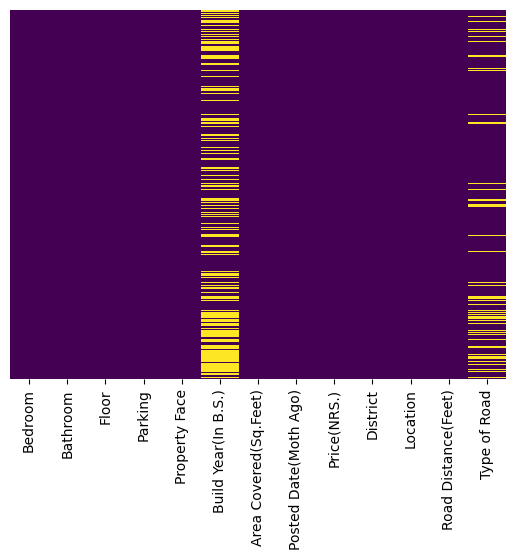

In [7]:
sns.heatmap(dataset.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [8]:
(dataset == 0).sum()

Bedroom                   0
Bathroom                 32
Floor                     0
Parking                  88
Property Face             0
Build Year(In B.S.)       0
Area Covered(Sq.Feet)     0
Posted Date(Moth Ago)     0
Price(NRS.)               0
District                  0
Location                  0
Road Distance(Feet)      15
Type of Road              0
dtype: int64

<Axes: >

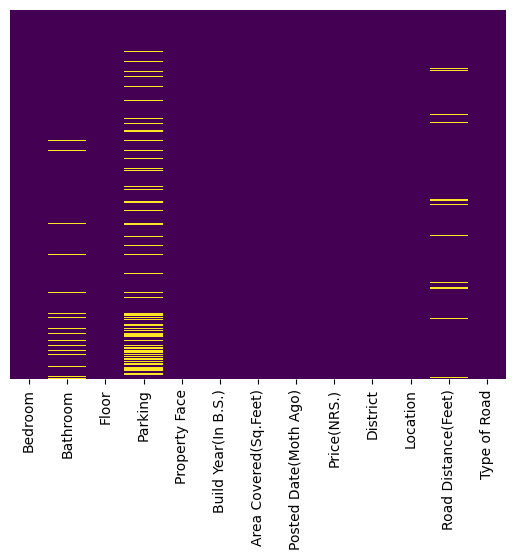

In [9]:
sns.heatmap(dataset == 0,yticklabels=False,cbar=False,cmap='viridis')

In [10]:
dataset.duplicated().sum() 

0

In [11]:
dataset.drop_duplicates(inplace=True)

## Filling Value

In [12]:
# Custom function to fill null and zero values
def fill_null_zero(data, column, value):
    data[column] = data[column].fillna(value).replace(0, value)

# Fill null and zero values with specified values
fill_null_zero(dataset, 'Bathroom', 3)
fill_null_zero(dataset, 'Parking', 2)
fill_null_zero(dataset, 'Build Year(In B.S.)', 2075)
fill_null_zero(dataset, 'Road Distance(Feet)', 14)

<Axes: >

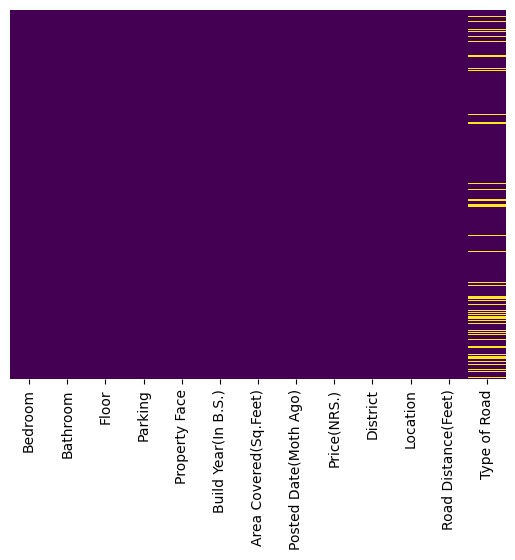

In [13]:
sns.heatmap(dataset.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<Axes: >

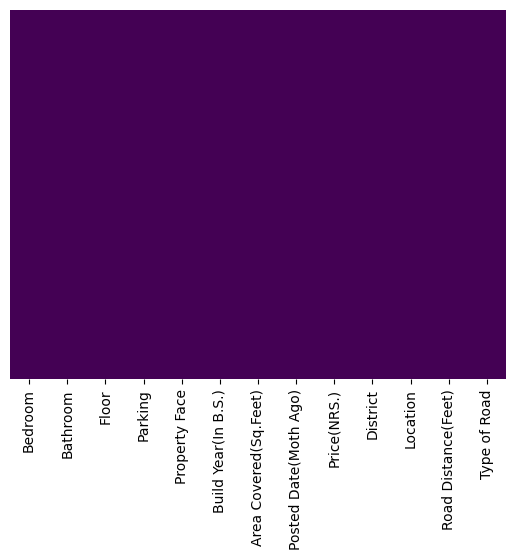

In [14]:
sns.heatmap(dataset == 0,yticklabels=False,cbar=False,cmap='viridis')

# Handle Categorical Value

In [15]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Bedroom                569 non-null    int64  
 1   Bathroom               569 non-null    int64  
 2   Floor                  569 non-null    float64
 3   Parking                569 non-null    int64  
 4   Property Face          569 non-null    object 
 5   Build Year(In B.S.)    569 non-null    float64
 6   Area Covered(Sq.Feet)  569 non-null    float64
 7   Posted Date(Moth Ago)  569 non-null    int64  
 8   Price(NRS.)            569 non-null    int64  
 9   District               569 non-null    object 
 10  Location               569 non-null    object 
 11  Road Distance(Feet)    569 non-null    int64  
 12  Type of Road           500 non-null    object 
dtypes: float64(3), int64(6), object(4)
memory usage: 57.9+ KB


In [16]:
Prop_Face = pd.get_dummies(dataset['Property Face'])

In [17]:
District = pd.get_dummies(dataset['District'])

In [18]:
Roadtype = pd.get_dummies(dataset['Type of Road'])

In [19]:
Location = pd.get_dummies(dataset['Location'])

In [20]:
dataset.drop(['Property Face','District','Location','Type of Road'], axis = 1, inplace = True)

In [21]:
dataset = pd.concat([Prop_Face,District,Roadtype,Location,dataset], axis = 1)

In [22]:
dataset.head()

,East,North,North East,North West,South,South East,South West,West,Bhaktapur,Kathmandu,...,Tokha,Bedroom,Bathroom,Floor,Parking,Build Year(In B.S.),Area Covered(Sq.Feet),Posted Date(Moth Ago),Price(NRS.),Road Distance(Feet)
0,False,False,False,False,False,False,False,True,False,True,...,False,6,5,2.5,1,2068.0,1326.21,3,40000000,13
1,False,False,False,False,False,True,False,False,False,False,...,False,5,5,2.5,1,2075.0,1026.75,1,27500000,12
2,False,False,True,False,False,False,False,False,False,False,...,False,3,4,2.5,1,2075.0,1369.00,9,34000000,18
3,False,False,False,False,True,False,False,False,False,False,...,False,5,6,3.0,1,2080.0,1796.81,1,55000000,13
4,True,False,False,False,False,False,False,False,False,False,...,False,6,7,3.0,3,2077.0,3080.25,36,150000000,16


In [23]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Columns: 135 entries, East to Road Distance(Feet)
dtypes: bool(126), float64(3), int64(6)
memory usage: 110.2 KB


# Model Building

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X = dataset.drop('Price(NRS.)', axis=1)
y = dataset['Price(NRS.)']

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [27]:
from sklearn.tree import DecisionTreeClassifier

In [28]:
dtree = DecisionTreeClassifier()

In [29]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

# Evaluating Model

In [30]:
predecitions = dtree.predict(X_test)

In [31]:
from sklearn.metrics import classification_report

In [32]:
print(classification_report(y_test, predecitions))

              precision    recall  f1-score   support

     5200000       0.00      0.00      0.00         0
     6500000       0.00      0.00      0.00         1
     7500000       0.00      0.00      0.00         1
     8000000       0.00      0.00      0.00         0
    10500000       0.00      0.00      0.00         1
    10600000       0.00      0.00      0.00         1
    11000000       0.00      0.00      0.00         1
    11500000       0.00      0.00      0.00         1
    12000000       0.00      0.00      0.00         1
    12500000       0.33      0.33      0.33         3
    13000000       0.00      0.00      0.00         1
    13500000       0.00      0.00      0.00         1
    14500000       0.00      0.00      0.00         1
    15000000       0.00      0.00      0.00         3
    16500000       0.00      0.00      0.00         4
    17000000       0.00      0.00      0.00         4
    17500000       0.00      0.00      0.00         2
    18000000       0.00    

C:\Users\milan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\milan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\milan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\milan\anaconda3\Lib\site-packages\sklearn\metrics\_cla

# Random Forest

In [33]:
from sklearn.ensemble import RandomForestClassifier

In [34]:
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [35]:
rfc_pred = rfc.predict(X_test)

In [36]:
print(classification_report(y_test, rfc_pred))

              precision    recall  f1-score   support

     6500000       0.00      0.00      0.00         1
     7500000       0.00      0.00      0.00         1
    10500000       0.00      0.00      0.00         1
    10600000       0.00      0.00      0.00         1
    11000000       0.00      0.00      0.00         1
    11300000       0.00      0.00      0.00         0
    11500000       0.00      0.00      0.00         1
    12000000       0.00      0.00      0.00         1
    12500000       0.29      0.67      0.40         3
    13000000       0.00      0.00      0.00         1
    13500000       0.00      0.00      0.00         1
    14500000       0.00      0.00      0.00         1
    15000000       0.25      0.33      0.29         3
    16000000       0.00      0.00      0.00         0
    16500000       0.00      0.00      0.00         4
    17000000       0.00      0.00      0.00         4
    17500000       0.00      0.00      0.00         2
    18000000       0.00    

C:\Users\milan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\milan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\milan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\milan\anaconda3\Lib\site-packages\sklearn\metrics\_cla

In [41]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

C:\Users\milan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [42]:
predictions = logmodel.predict(X_test)

In [43]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

     6500000       0.00      0.00      0.00         1
     7500000       0.00      0.00      0.00         1
    10500000       0.00      0.00      0.00         1
    10600000       0.00      0.00      0.00         1
    11000000       0.00      0.00      0.00         1
    11500000       0.00      0.00      0.00         1
    12000000       0.00      0.00      0.00         1
    12500000       0.00      0.00      0.00         3
    13000000       0.00      0.00      0.00         1
    13500000       0.00      0.00      0.00         1
    14500000       0.00      0.00      0.00         1
    15000000       0.00      0.00      0.00         3
    16500000       0.00      0.00      0.00         4
    17000000       0.00      0.00      0.00         4
    17500000       0.00      0.00      0.00         2
    18000000       0.00      0.00      0.00         2
    18500000       0.00      0.00      0.00         1
    19000000       0.00    

C:\Users\milan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\milan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\milan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [46]:
lm = LinearRegression()

In [47]:
lm.fit(X_train,y_train)

LinearRegression()

In [48]:
y_pred = lm.predict(X_test)

In [49]:
r2 = r2_score(y_test,y_pred)

In [50]:
r2

-13365823589102.676